In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers,models
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train,x_test=x_train/255,x_test/255
model=models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(500,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [14]:
model.compile(optimizer='RMsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1152500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [16]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 4.2172 - val_accuracy: 0.7044
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9949 - val_loss: 4.6895 - val_accuracy: 0.7023
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 4.9907 - val_accuracy: 0.7001
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9950 - val_loss: 5.5693 - val_accuracy: 0.6977
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0164 - accuracy: 0.9955 - val_loss: 5.4955 - val_accuracy: 0.7020
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0160 - accuracy: 0.9962 - val_loss: 5.7783 - val_accuracy: 0.7032
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0156 - accuracy: 0.9963 - val_loss: 5.6219 - val_accuracy:

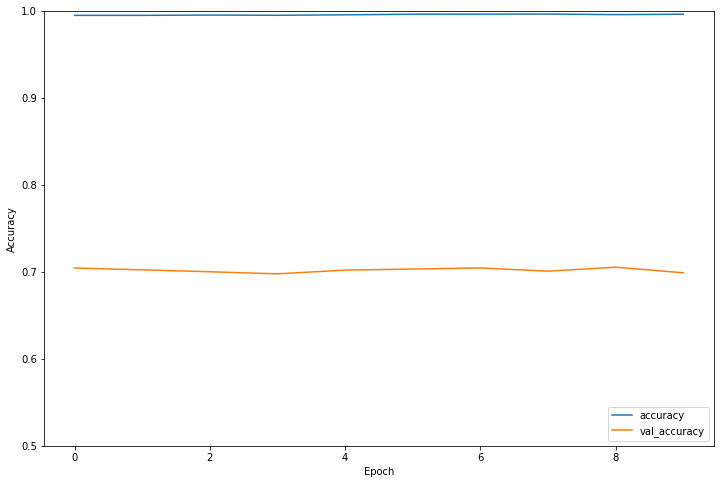

In [17]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')